In [34]:
using Revise
using Bilevel
using Bilevel: VariableSelector, ConstraintSelector, add_var!, add_eq!, add_ineq!, contact_jacobian!, contact_friction_τ_direct!, contact_normal_τ_direct!

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using Plots
using LinearAlgebra
using StaticArrays
using ForwardDiff
using Base.Threads

## Generating data

In [219]:
urdf = joinpath("..", "..", "urdf", "box2d.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, 1.125)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)

Environment(Contact[Contact(Spanning tree:
Vertex: world (root)
  Vertex: floor, Edge: floor_to_world
    Vertex: box, Edge: floor_to_box
No non-tree joints., box, Point3D in "after_floor_to_box": [0.0, 0.0, -0.0375], Obstacle(floor, Point3D in "after_floor_to_world": [0.0, 0.0, 0.0], FreeVector3D in "after_floor_to_world": [0.0, 0.0, 1.0], [1.0 6.12323e-17 -1.0 -1.83697e-16; 0.0 1.0 1.22465e-16 -1.0; 0.0 0.0 0.0 0.0], 1.125, false))])

In [220]:
mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf))
IJuliaCell(mvis)

WebIO.Scope("scope-ae888b03-ed59-437c-a026-f58560f01553", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/b464848323e0a4c9a3cfe11f8edca2932188b6d9-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/cff5eb7af79db7e6d407febf164549a9fdb258cd-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-cd5db64b-9c0f-4063-8290-3ea255c3fd4a&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-cd5db64b-9c0f-4063-8290-3ea255c3fd4a&quot;,&quot;id&quot;:&quot;ob_08&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_07&quot;,&quot;value&quot;:[131,166,109,97,116,114,105,120,199,64,23,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,164,116,121,112,101,173,115,101,116,95,116,114,97,110,115,102,111,114,109,164,112,97,116,104,184,47,109,101,115,104,99,97,116,47,119,111,114,108,100,47,102,108,111,111,114,47,98,111,120]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_09&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_08&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&q

In [ ]:
widget = manipulate!(mvis)

In [221]:
N = 10
Δt = 0.1
q0 = [0., -0.0375, 0.]
v0 = [7., 0., 0.]

sim_data = get_sim_data_indirect(mechanism,env,Δt)
null_ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)
set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)
traj = Bilevel.simulate(sim_data,null_ctrl!,x0,N)

(Array{Float64,1}[[0.0, -0.0375, 0.0], [0.589637, -0.0375, 6.82873e-6], [1.06891, -0.0375, 2.04862e-5], [1.43782, -0.0375, 4.09726e-5], [1.69636, -0.0375, 6.82878e-5], [1.84453, -0.0375, 0.000102432], [1.88234, -0.0375, 0.000143405], [1.88234, -0.0375, 0.000186718], [1.88234, -0.0375, 0.00023003], [1.88234, -0.0375, 0.000273342]], Array{Float64,1}[[7.0, 0.0, 0.0], [5.89637, -4.02647e-5, 6.82873e-5], [4.79272, -9.81849e-5, 0.000136575], [3.68907, -0.000151151, 0.000204864], [2.58542, -0.000176552, 0.000273152], [1.48175, -0.000151777, 0.000341442], [0.378072, -5.42156e-5, 0.000409732], [1.62421e-5, -3.51731e-10, 0.000433124], [1.62421e-5, -3.51748e-10, 0.000433124], [1.62421e-5, -3.51748e-10, 0.000433124]], Array{Float64,1}[], Array{Array{Float64,1},1}[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.00001, 0.0, 0.0, 1.12501, 0.0, 5.89636]], [[1.00002, 0.0, 0.0, 1.12502, 0.0, 4.79272]], [[1.00002, 0.0, 0.0, 1.12503, 0.0, 3.68907]], [[1.00003, 0.0, 0.0, 1.12503, 0.0, 2.5854]], [[1.00004, 0.0, 0.0, 

In [223]:
setanimation!(mvis, traj[6], traj[1])

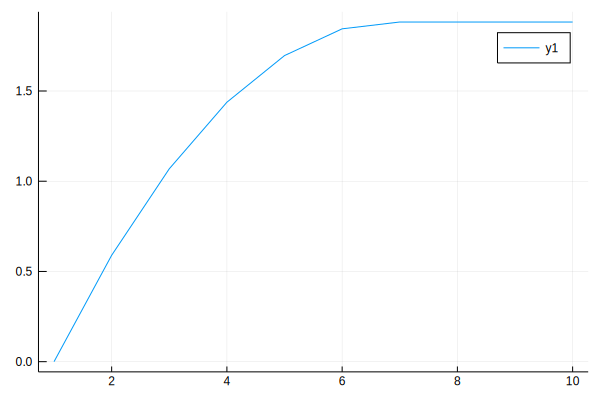

In [222]:
plot(traj[7][1,:])

In [224]:
traj[7][:,end]

6-element Array{Float64,1}:
  1.882344890668978     
 -0.037499998634247966  
  0.0002733424096741491 
  1.6242149717838517e-5 
 -3.5174761891639743e-10
  0.00043312399463335695

In [225]:
num_pos = num_positions(mechanism)
num_vel = num_velocities(mechanism)

sample_vs = VariableSelector()
add_var!(sample_vs, :q0, num_pos)
add_var!(sample_vs, :v0, num_vel)
add_var!(sample_vs, :u0, num_vel)
add_var!(sample_vs, :qnext, num_pos)
add_var!(sample_vs, :vnext, num_vel)
add_var!(sample_vs, :h, 1)

data = Array{Array{Float64,1},1}()

for n = 1:N-1
    q0 = traj[1][n]
    v0 = traj[2][n]
    u0 = zeros(num_vel)
    qnext = traj[1][n+1]
    vnext = traj[2][n+1]
    h = traj[6][n+1] - traj[6][n]
    
    sample = zeros(Float64, sample_vs.num_vars)
    sample[sample_vs(:q0)] = q0
    sample[sample_vs(:v0)] = v0
    sample[sample_vs(:u0)] = u0
    sample[sample_vs(:qnext)] = qnext
    sample[sample_vs(:vnext)] = vnext
    sample[sample_vs(:h)] = [h]
    
    push!(data, sample)
end

## Bilevel parameter estimation

In [233]:
vs = VariableSelector()
cs = ConstraintSelector()
add_var!(vs, :μ, 1)
add_ineq!(cs, :μ_pos, 1)

function generate_solver_fn_estimation_direct(data, sample_vs)    
    sim_data = get_sim_data_direct(mechanism,env,Δt)
    num_contacts = length(sim_data.env.contacts)
    num_vel = num_velocities(mechanism)
    num_samples = length(data)
    
    sim_data.normal_options[1]["num_fosteps"] = 0
    sim_data.normal_options[1]["num_sosteps"] = 25
    sim_data.normal_options[1]["c"] = 1
    sim_data.normal_options[1]["c_fos"] = 1
    sim_data.normal_options[1]["c_sos"] = 1

    sim_data.fric_options[1]["num_fosteps"] = 0
    sim_data.fric_options[1]["num_sosteps"] = 25
    sim_data.fric_options[1]["c"] = 1
    sim_data.fric_options[1]["c_fos"] = 1
    sim_data.fric_options[1]["c_sos"] = 1
    
    function eval_obj(params::AbstractArray{T}) where T
        # set the friction coefficient for the floor
        obstacles[1].μ = vs(params, :μ)[1]
        
        # evaluate the dynamics residual on each datapoint as an inner problem
        losses = Array{T,1}(undef, num_samples)
        @threads for i = 1:num_samples
            sample = data[i]
            q0 = sample_vs(sample, :q0)
            v0 = sample_vs(sample, :v0)
            u0 = sample_vs(sample, :u0)
            qnext = sample_vs(sample, :qnext)
            vnext = sample_vs(sample, :vnext)
            h = sample_vs(sample, :h)[1]

            x0 = sim_data.state_cache[1][Float64]
            xn = sim_data.state_cache[2][Float64]
            envj = sim_data.envj_cache[2][Float64]

            set_configuration!(x0, q0)
            set_velocity!(x0, v0)
            setdirty!(x0)
            set_configuration!(xn, qnext)
            set_velocity!(xn, vnext)
            setdirty!(xn)

            normalize_configuration!(x0)
            normalize_configuration!(xn)

            H = mass_matrix(x0)
            Hi = inv(H)
            config_derivative = configuration_derivative(xn)
            dyn_bias = dynamics_bias(xn)

            contact_jacobian!(envj, xn)
            normal_bias = Vector{T}(undef, num_vel)
            contact_bias = Vector{T}(undef, num_vel)
            
            x_normal = contact_normal_τ_direct!(normal_bias, sim_data, h, Hi, envj, dyn_bias, u0, v0, params, 1)
            # for now assume distributed normal force
            x_normal ./= num_contacts
            
            contact_friction_τ_direct!(contact_bias, sim_data, h, Hi, envj, dyn_bias, u0, v0, params, x_normal, 1)
        
            contact_bias_exp = u0 .- dyn_bias .- (1. / h) * H * (vnext - v0)
            
            # if (T<:ForwardDiff.Dual)
            #     display(map(ForwardDiff.value, map(ForwardDiff.value, contact_bias)))
            #     display(map(ForwardDiff.value, contact_bias_exp))
            # end
                
            err = contact_bias - contact_bias_exp
            loss = err'*err
            
            losses[i] = loss
        end
        
        # add losses
        sum(losses)
    end

    function eval_cons(params::AbstractArray{T}) where T        
        # friction coeffs are positive
        g = Vector{T}(undef, cs.num_eqs + cs.num_ineqs)
        μ = params[1]
        g[cs(:μ_pos)] .= [1e-6 - μ]
        
        g
    end
    
    return Bilevel.generate_autodiff_solver_fn(eval_obj,eval_cons,cs.eqs,cs.ineqs,vs.num_vars,hessian=false)
end

solver_fn = generate_solver_fn_estimation_direct(data, sample_vs)

μ0 = [.1]
options = Dict{String, Any}()
options["Derivative option"] = 1
options["Verify level"] = -1
options["Major optimality tolerance"] = 1e-6
options["Scale option"] = 2;

In [234]:
μopt, info = Bilevel.snopt(solver_fn, cs.num_eqs, cs.num_ineqs, μ0, options)

([1.125], "Finished successfully: optimality conditions satisfied")

In [227]:
display(solver_fn([.2]))
display(solver_fn([.5]))
display(solver_fn([.75]))
display(solver_fn([1.]))
display(solver_fn([1.125]))
display(solver_fn([1.25]))
display(solver_fn([1.5]))
display(solver_fn([2.]))

(13.560367605056136, Float64[], [-0.199999], [-30.0975], Array{Float64}(0,1), [-1.0], [0.0])

(6.149656264141305, Float64[], [-0.499999], [-19.6789], Array{Float64}(0,1), [-1.0], [0.0])

(2.2138762625396966, Float64[], [-0.749999], [-11.8073], Array{Float64}(0,1), [-1.0], [0.0])

(0.24598625476359556, Float64[], [-0.999999], [-3.93578], Array{Float64}(0,1), [-1.0], [0.0])

(6.600500832989247e-15, Float64[], [-1.125], [-3.68666e-7], Array{Float64}(0,1), [-1.0], [0.0])

(0.2459862477505096, Float64[], [-1.25], [3.93578], Array{Float64}(0,1), [-1.0], [0.0])

(2.2138762427592074, Float64[], [-1.5], [11.8073], Array{Float64}(0,1), [-1.0], [0.0])

(10.434024863056557, Float64[], [-2.0], [22.9585], Array{Float64}(0,1), [-1.0], [0.0])

## Bilevel trajectory optimization (box only)

In [270]:
μ_estimate = 1.125

obstacles[1].μ = μ_estimate

q1 = [0., -0.0375, 0.]
qN = [1.7, -0.0375, 0.]
N = 10
Δt = .1

q_min = [-5., -5., -2*pi]
q_max = [5., 5., 2*pi]

function get_prob_limits(sim_data)
    x_min = -1e19*ones(sim_data.vs.num_vars)
    x_max = 1e19*ones(sim_data.vs.num_vars)
    
    # joint limits
    add_box_con_snopt!(x_min, x_max, sim_data, :q, q_min, q_max, 1:N)
    add_box_con_snopt!(x_min, x_max, sim_data, :h, [.9*Δt], [1.1*Δt], 1:N-1)
    
    # torques limits
    add_box_con_snopt!(x_min, x_max, sim_data, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)

    x_min, x_max
end

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, length(q1), x -> vs(x, :q1) - q1)
    add_eq!(sim_data, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
    add_eq!(sim_data, :cv1, 1, x -> vs(x, :v1)[2])
    add_eq!(sim_data, :cvN, 1, x -> vs(x, Symbol("v", N))[1])
end

function get_prob_init(sim_data)
    x0 = zeros(sim_data.vs.num_vars)
    for n = 1:N
        x0[sim_data.vs(Symbol("q", n))] .= n/N*(qN - q1) + q1
    end
    
    x0
end

get_prob_init (generic function with 1 method)

In [272]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
x0 = get_prob_init(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1)

The problem appears to be infeasible: nonlinear infeasibilities minimized


(Array{Float64,1}[[3.46945e-18, -0.0375, 0.0], [0.554427, -0.0375, -2.32649e-5], [0.971599, -0.0375, -3.89901e-5], [1.29938, -0.0375, -4.91842e-5], [1.56646, -0.0375, -5.3381e-5], [1.7, -0.0375, -4.93151e-5], [1.7, -0.0375, -3.69863e-5], [1.7, -0.0375, -2.46575e-5], [1.7, -0.0375, -1.23288e-5], [1.7, -0.0375, 0.0]], Array{Float64,1}[[6.71557, 0.0, -0.000303446], [5.62848, 0.000130943, -0.000236182], [4.63523, 0.000180729, -0.000174725], [3.64198, 0.000179128, -0.000113268], [2.428, 0.000129609, -3.81526e-5], [1.21401, 5.98689e-5, 3.69632e-5], [4.20299e-6, -2.59052e-11, 0.00011208], [4.20299e-6, -2.80554e-11, 0.00011208], [4.20299e-6, -2.65452e-11, 0.00011208], [4.20299e-6, -2.66154e-11, 0.00011208]], Array{Float64,1}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], [0.0985039, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11], Array{Float64,1}[[0.999974, 0.0, -1.02327e-16, 1.12497, -3

In [283]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
x0 = get_prob_init(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1)

Terminated after numerical difficulties: singular basis


(Array{Float64,1}[[0.0, -0.0375, 0.0], [0.516797, -0.0375, -2.15368e-5], [0.944203, -0.0375, -3.75424e-5], [1.28222, -0.0375, -4.80168e-5], [1.55742, -0.0375018, -5.26586e-5], [1.7, -0.0375, -5.10403e-5], [1.7, -0.0375, -3.82802e-5], [1.7, -0.0375, -2.55201e-5], [1.7, -0.0375, -1.27601e-5], [1.7, -0.0375, 0.0]], Array{Float64,1}[[6.73543, 0.0, -0.000300754], [5.74219, 0.00012366, -0.000239297], [4.74895, 0.000178271, -0.00017784], [3.7557, 0.000180312, -0.000116383], [2.57757, 0.000273687, -4.34861e-5], [1.58417, 0.000101358, 1.79805e-5], [-1.97483e-6, -2.64928e-8, 0.000116001], [4.35005e-6, -2.79187e-11, 0.000116001], [4.35002e-6, -2.77473e-11, 0.000116001], [0.0, -2.81408e-11, 0.000116001]], Array{Float64,1}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], [0.09, 0.09, 0.09, 0.106766, 0.0900003, 0.11, 0.11, 0.11, 0.11], Array{Float64,1}[[0.999976], [0.999982], [0.999988], [0.99966

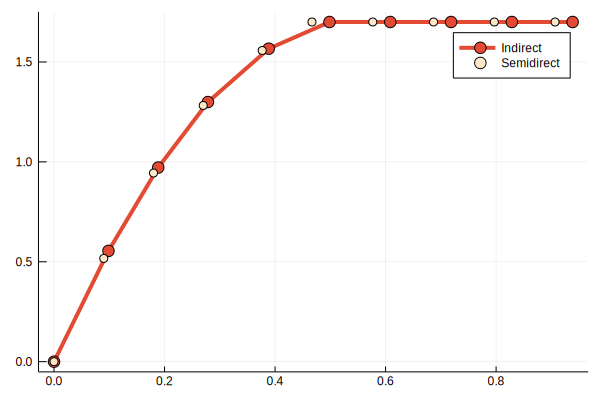

In [284]:
j = 1
plot(traj_indirect[7],traj_indirect[8][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_semidirect[7],traj_semidirect[8][j,:],label="Semidirect",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

## Bilevel trajectory optimization (with arm)